In [8]:
import pandas as pd 
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with open('3_column_plot_data.pkl', 'rb') as file:
    results = pickle.load(file)

In [7]:
df = pd.DataFrame(results)
df

,data,method,ci_mean,ci_low_95,ci_high_95
0,afib,proximal,1.326186,1.233509,1.412074
1,afib,baseline,1.694353,1.618803,1.746905
2,afib,backdoor,1.648553,1.619575,1.680126
3,heart,proximal,1.267184,1.161252,1.382979
4,heart,baseline,1.581546,1.527569,1.628814
5,heart,backdoor,1.518746,1.493133,1.545630
6,kidney,proximal,1.408189,1.245608,1.520294
7,kidney,baseline,1.412324,1.364562,1.448942
8,kidney,backdoor,1.412592,1.386521,1.441816


In [62]:
data_order = ["afib", "heart", "kidney"]
data_labels_clean = ["Est. ACE for "+x for x in ["A-fib", "Heart", "Kidney"]] 
method_order = ["baseline", "backdoor", "proximal"]
method_order_clean_labels = ["Random Baseline", "Backdoor", "Ours (proximal)"]
true_ace = 1.3

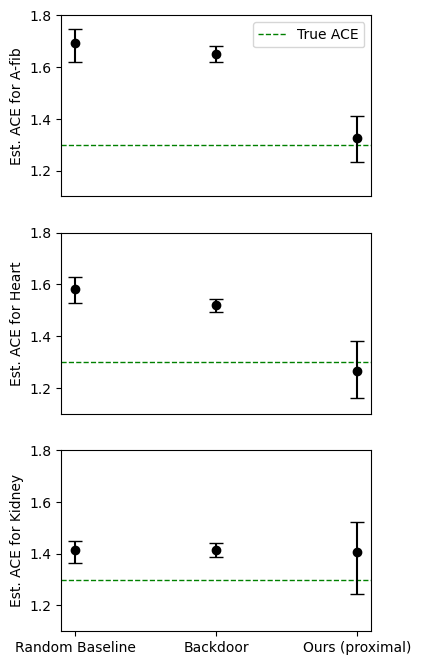

In [65]:
fig, axs = plt.subplots(3, 1, figsize=(4, 8))
for ax_no, ax in enumerate(axs):
    data_subset = df.loc[df["data"] == data_order[ax_no]]
    
    #Y-label 
    ax.set_ylabel(data_labels_clean[ax_no])
    
    #Put in the true value 
    ax.axhline(y=true_ace, color='green', linewidth=1, label="True ACE", linestyle='--')
    
    #Other cleanup
    ax.set_ylim(1.1, 1.8)
    
    for method_no in range(3): 
        method_subset = data_subset.loc[data_subset["method"] == method_order[method_no]]
        mean = method_subset["ci_mean"].iloc[0]
        lower = method_subset["ci_low_95"].iloc[0]
        upper = method_subset["ci_high_95"].iloc[0]
        error = np.array([mean - lower, upper - mean]).reshape(-1, 1)
        
        ax.errorbar(method_no, mean, yerr=error, fmt='o', capsize=5, color='black')
        
    if ax_no == 0: 
        ax.legend()
        
    # Put in xtick labels for the last one but not others
    if ax_no == len(method_order)-1:
        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(method_order_clean_labels)
    else: 
        ax.set_xticks([])
        ax.set_xticklabels([])